In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from plot_prob import plot_samples_continuous, \
    dibuja_normal, \
    dibuja_distribucion_empirica, \
    plot_normals,\
    plot_exponentials

En esta hoja veremos una primera aproximación a las distribuciones de probabilidad continuas.

## Distribuciones de probabilidad continuas

En una distribución de probabilidad **continua**, el resultado de una extracción aleatoria no es necesariamente un número entero, sino que puede ser cualquier número real. Por tanto, no podemos comparar el resultado de una extracción aleatoria contra una tabla de valores, y es *casi seguro* que no extraeremos nunca el mismo valor dos veces.

A veces usamos las distribuciones continuas para aproximar funciones discretas, pero que pueden tomar muchos valores. Por ejemplo, las ganancias (o pérdidas) al jugar muchas veces a un mismo juego de azar no son estrictamente una distribución continua, porque los céntimos de euro son indivisibles, pero se distribuyen de forma muy aproximada según una distribución gaussiana.

Como el resultado puede ser cualquier número real, con precisión infinita, nunca ocurrirá que el valor sea exactamente 0, 0.5, 1.

Por tanto, no podemos calcular la probabilidad de que X tome ciertos valores sumando las probabilidades de los puntos individuales y hacemos otra cosa:

 - 1) Definimos una **función de densidad** $f:\mathbb{R}\rightarrow\mathbb{R}^+$ tal que:
$$
\int_{\mathbb{R}} \;f(x)\:dx = 1
$$
En el caso de la distribución Normal(0,1), la función de densidad es:
$$
f(x) = {\displaystyle {\frac {1}{\sqrt {2\pi }}}e^{-{\frac {x ^{2}}{2}}}}
$$
*La **función de densidad** debe satisfacer:*
 - **es siempre positiva**
 - **su integral sobre todos los números reales es 1**.

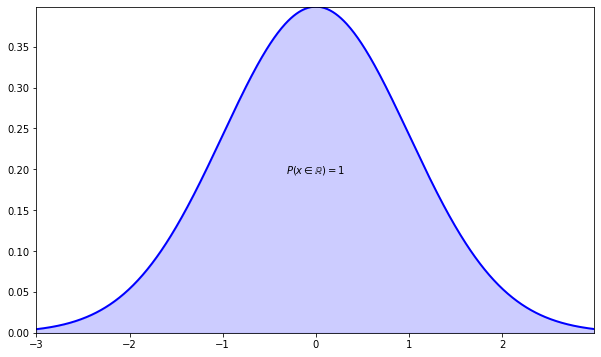

In [2]:
dibuja_normal(0,1)

 - 2) Definimos la probabilidad de que $X$ pertenezca a un conjunto $A\subset\mathbb{R}$ como
$$
P(X\in A)=\int_{A} \;f(x)\:dx
$$
Si $I=[a,b]$ es un intervalo:
$$
P(X\in I)=\int_{I} \;f(x)\:dx=\int_{a}^b \;f(x)\:dx
$$
Es el **área bajo la curva**, que sabéis que se puede calcular *integrando la función de densidad*.

*Como la función de densidad*:
 - **es siempre positiva** => *las probabilidad son siempre mayores o iguales que cero*.
 - **su integral sobre todos los números reales es 1** => *la probabilidad del evento total $x\in\mathbb{R}$ es 1*.

Además, si tenemos dos conjuntos disjuntos ($A\cap B=\emptyset$):
$$
\begin{align}
P(X\in A\cup B)&=\int_{A\cup B} \;f(x)\:dx \\
&=\int_{A} \;f(x)\:dx + \int_{B} \;f(x)\:dx \\
&=P(X\in A) + P(X\in B)
\end{align}
$$
Por tanto, *cualquier función de densidad positiva, y con integral 1 define una distribución de probabilidad continua*.

In [3]:
# NO DEJES DE PROBAR A CAMBIAR LOS VALORES
dibuja_normal(0,1,-0.5,1)

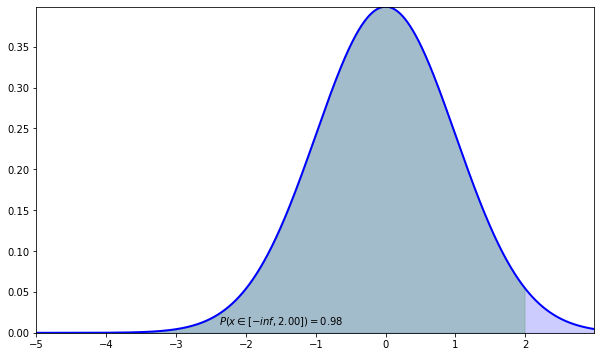

In [4]:
# NO DEJES DE PROBAR A CAMBIAR LOS VALORES
dibuja_normal(0,1,-np.inf,2)

### Gaussiana (distribución normal)

Es la familia de distribuciones de probabilidad más importante (después veremos por qué).

Es una familia que depende de dos parámetros:

 - $\mu$, la **media**.
 - $\sigma$, la **desviación típica**. Tiene que ser positiva.

La podemos escribir

 - $N(\mu, \sigma)$ (y leemos "la normal con media $\mu$ y desviación típica $\sigma$")
 - $N(\mu, \sigma^2)$ (y leemos "la normal con media $\mu$ y varianza $\sigma^2$")

Los posibles valores son todos los números reales, pero valores muy superiores, o muy inferiores, a la media son muy poco probables.

Vamos a probar a modificar los dos parámetros para ver el efecto de cada cual (traslación y dilatación).

Puedes encontrar más información sobre la [distribución gaussiana en la wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

La **función de densidad** de $N(\mu, \sigma)$ es:
$$
f(x) = {\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}
$$
 - La media es $\mu$
 - La desviación típica es $\sigma$
 - La varianza es $\sigma^2$

¿Qué significan los parámetros?

Prueba a cambiarlos en el dibujo de la función de densidad de la normal... ¿qué ocurre?

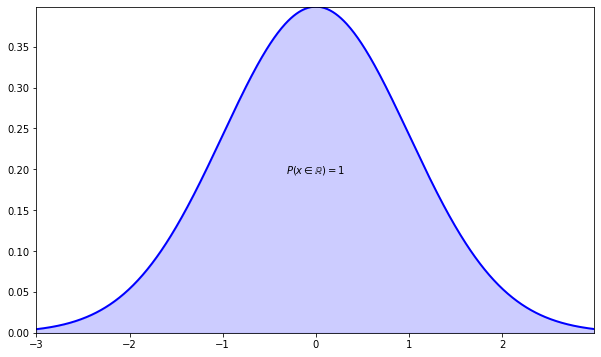

In [5]:
dibuja_normal(0,1)

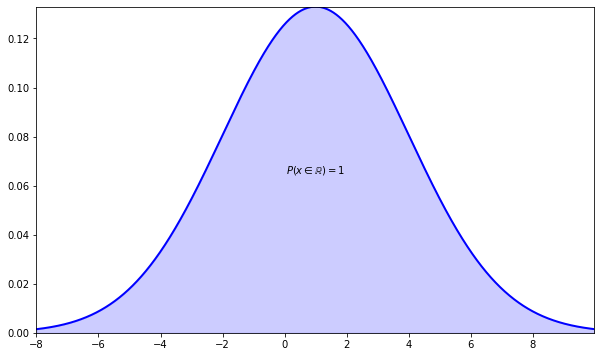

In [6]:
dibuja_normal(1,3)

Es más fácil comparar si dibujamos las funciones de densidad de varias normales distintas en la misma gráfica.

In [7]:
#Misma media, distinta desviación típica
PARAMS = [(0,.5), (0,1), (0,2)]
plot_normals(PARAMS)

In [8]:
#Misma desviación típica, distinta media
PARAMS = [(1,1), (2,1), (5,1)]
plot_normals(PARAMS)

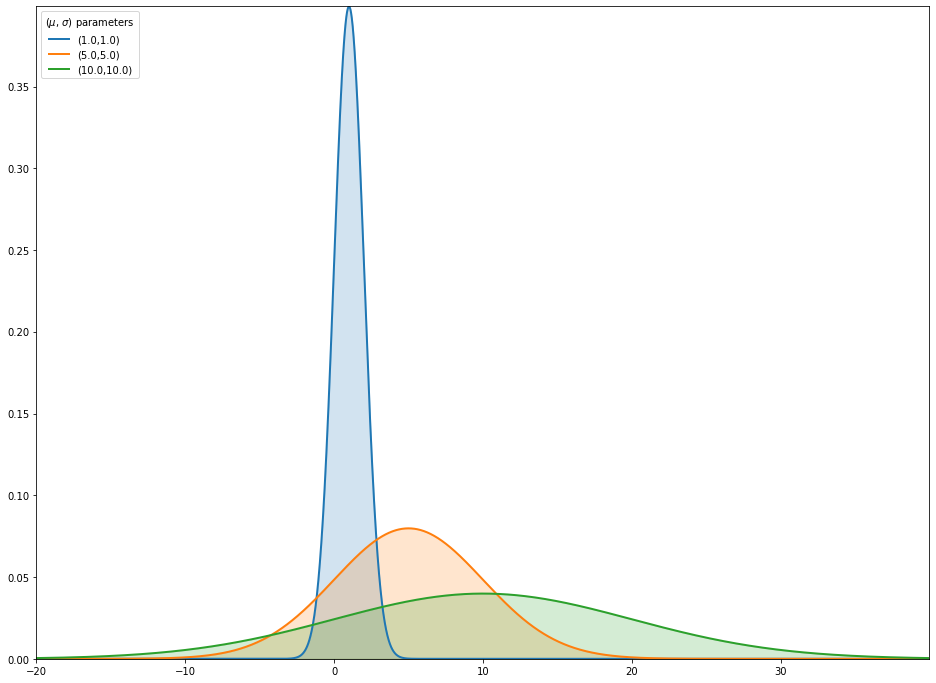

In [9]:
PARAMS = [(1,1), (5,5), (10,10)]
plot_normals(PARAMS)

**Ejemplo**:

  - En la población A la media de altura es 170cm y la desviación típica es de 20 cm.
  - En la población B la media de altura es 180cm y la desviación típica es de 10 cm.
 
**Pregunta**:

  - ¿Cuál es la proporción de personas en cada población que miden más de 190cm?
  - ¿Cuál es la proporción de personas en cada población que miden más de 200cm?

In [10]:
dibuja_normal(170,20,180,np.inf)

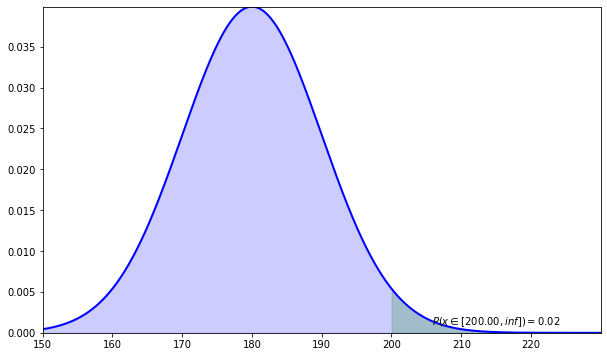

In [11]:
dibuja_normal(180,10,200,np.inf)

In [12]:
#P(X > 200) = 1 - P(X <= 200)
N = st.norm(loc=180, scale=10)
1 - N.cdf(200)

0.02275013194817921

In [13]:
plot_normals([(170,20), (180,10)])

### Función de distribución
Recordemos que hemos definido la probabilidad de que $X$ pertenezca a un conjunto $A\subset\mathbb{R}$ como
$$
P(X\in A)=\int_{A} \;f(x)\:dx
$$

Es el **área bajo la curva**, que sabéis que se puede calcular *mediante una **primitiva** de la función de densidad*.

Definimos la **función de distribución** $F$ como esta primitiva concreta:
$$
F(x) = \int_{-\infty}^x \;f(t)\:dt
$$
Ahora podemos calcular la probabilidad de un intervalo $I=[a,b]$ de esta forma:
$$
P(X\in I)=\int_{I} \;f(x)\:dx=\int_{a}^b \;f(x)\:dx = F(b) - F(a)
$$

En la librería scipy.stats, si N es una distribución **continua**:
 - ``N.pdf(x)`` es la función de densidad evaluada en x (probability density function)
 - ``N.cdf(x)`` es la función de densidad evaluada en x (cumulative distribution function)

**Ejemplo**:
  - En la población A la media de altura es 170cm y la desviación típica es de 20 cm.

Definimos el objeto `scipy.stats` que representa la población A:

In [14]:
A = st.norm(170,20)

La media de la población A:

In [15]:
A.mean()

170.0

La probabilidad de que la altura de un individuo de la población A sea menor que 180:

In [16]:
A.cdf(180)

0.6914624612740131

La probabilidad de que la altura de un individuo de la población A esté entre 110 y 230:

In [17]:
A.cdf(230) - A.cdf(110)

0.9973002039367398

El percentil 99:

In [18]:
A.ppf(0.99)

216.5269574808168

Una muestra aleatoria de tamaño 10

In [19]:
A.rvs(10)

array([175.13470128, 183.78374106, 197.79325778, 153.60847627,
       190.30670555, 183.75347873, 175.06047426, 137.68658763,
       178.65203858, 158.8629694 ])

**Ejercicio**:
  - En la población A la media de altura es 170cm y la desviación típica es de 20 cm.
  - En la población B la media de altura es 180cm y la desviación típica es de 10 cm.

Responde a las siguientes preguntas **usando la función de distribución** ``N.cdf``:

  - ¿Cuál es la proporción de personas en cada población que miden menos de 160cm?
  - ¿Cuál es la proporción de personas en cada población que miden menos de 190cm?
  - ¿Cuál es la proporción de personas en cada población que miden más de 200cm?  

### Función de distribución empírica

Si ``xs`` es una muestra de un fenómeno aleatorio, la *función de distribución empírica de la muestra* ``xs``, se define como
$$
{\displaystyle {\widehat {F}}_{n}(t)={\frac {{\mbox{numero de elementos en la muestra}}\leq t}{n}}={\frac {1}{n}}\sum _{i=1}^{n}\mathbf {1} _{x_{i}\leq t},}
$$

En la siguiente gráfica comparamos la función de distribución de N2 (que es una función continua) con la *función de distribución empírica* de una muestra aleatoria de otra distribución N2 (que es constante a trozos).

In [20]:
N1 = st.norm(170,20)
N2 = st.norm(170,50)
muestra1 = N1.rvs(100)
muestra2 = N2.rvs(100)
#Comparamos la muestra aleatoria de N1 con la cdf de N2

dibuja_distribucion_empirica(muestra1,N2)

...vemos que no se parecen. Sin embargo, si comparamos la función de distribución de N1 con la *función de distribución empírica* de una muestra aleatoria de _la misma_ N1, se parecen bastante:

In [21]:
dibuja_distribucion_empirica(muestra1,N1)

y también se parecen la función de distribución de N2 con la *función de distribución empírica* de una muestra aleatoria de N2:

In [22]:
dibuja_distribucion_empirica(muestra2,N2)

El [teorema de Glivenko-Cantelli](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem) demuestra que la función de distribución empírica de una muestra converge a la función de distribución cuando el tamaño de la muestra crece.

### Ejemplo: cambio de escala de una variable normal

Las variables aleatorias normales tienen una *propiedad importante*:

> Si $X$ sigue una Normal($\mu, \sigma$) => $aX+b$ sigue una Normal($a\mu+b,a\sigma$)

En particular:

> - Si $X$ sigue una Normal($\mu, \sigma$) => $\frac{X-\mu}{\sigma}$ sigue una Normal(0,1)

> - Si $X$ sigue una Normal(0,1) => $X\sigma + \mu$ sigue una Normal($\mu, \sigma$)



Vamos a comprobarlo numéricamente:

In [23]:
mean = 50
std  = 20

#Muestra de Normal(mean, std)
N = st.norm(loc=mean, scale=std)
muestra1 = N.rvs(100)

#Muestra de Normal(0,1), pero escalada
N01 = st.norm(loc=0, scale=1)
muestra2 = mean + std*N01.rvs(100)

Comprobamos que si generamos una muestra aleatoria de una Normal(0,1) y la escalamos `x->x*std+mean` obtenemos una muestra aleatoria cuya función de distribución empírica se parece a la función de distribución de la Normal(mean, std). Al menos tanto como la función de distribución empírica de una muestra aleatoria de la Normal(mean, std):

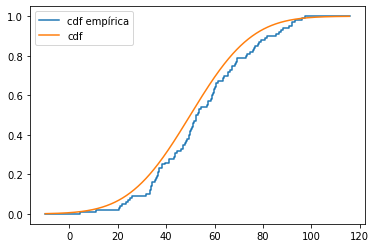

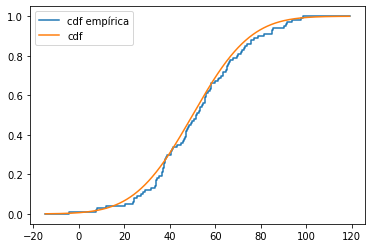

In [24]:

dibuja_distribucion_empirica(muestra1,N)
dibuja_distribucion_empirica(muestra2,N)

## Distribución exponencial

La distribución exponencial es una distribución de probabilidad continua que sólo toma valores positivos.

Depende de un sólo parámetro:

 - $\lambda$: la **tasa** (**firing rate**), que en realidad es la misma tasa que vimos al estudiar la distribución de Poisson.

La distribución exponencial mide un aspecto diferente del proceso de Poisson: si la distribución de Poisson mide la distribución del número de eventos observados en un intervalo de tiempo, la distribución exponencial mide el tiempo entre dos eventos:

 - el número de eventos en un intervalo tiene que ser un número entero => la distribución de Poisson es discreta.
 - el tiempo entre dos eventos puede ser cualquier número real positivo => la distribución exponencial es continua.
 
Por tanto, la distribución de Poisson y la exponencial son dos caras de la misma moneda.

La **función de densidad** de $Exp(\lambda)$ es:
$$
f(x) = \lambda e^{-\lambda x}
$$
 - La media es $\frac{1}{\lambda}$
 - La desviación típica es $\frac{1}{\lambda}$
 - La varianza es $\frac{1}{\lambda^2}$

In [25]:
#Atencion, para fijar el parametro de la distribucion exponencial
#no se puede introducir la tasa directamente, hay que fijar el
#parametro "mean" o "scale"

E = st.expon(scale=1/100)
E.mean(), E.std(), E.var()

(0.01, 0.01, 0.0001)

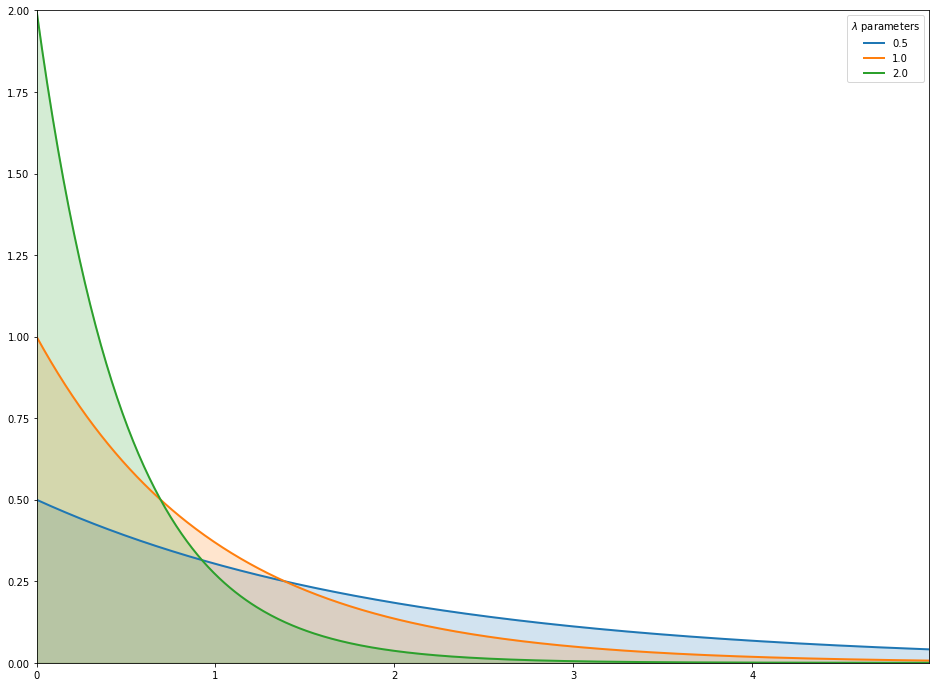

In [26]:
plot_exponentials([0.5,1,2])

### Ejercicio 8 de la hoja
Se estima que la vida útil (hasta la rotura) de un tipo de componente electrónico sigue una distribución exponencial con valor esperado de 8 años. Se pide:
 - Calcular la probabilidad de que un elemento tenga una vida entre 3 y 12 años.
 - Calcular el percentil 95 de la distribución (tiempo en el que la probabilidad acumulada es del 95\%)
 - Calcular la probabilidad de que un elemento que ha durado ya 10 años, dure más de 25.

In [27]:
E = st.expon(scale=8)
E.cdf(12) - E.cdf(3)

0.4641591186425424

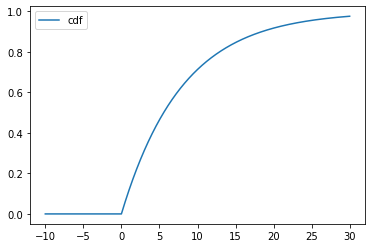

In [28]:
xs = np.arange(-10,30,0.01)
ys = E.cdf(xs)
plt.plot(xs,ys, label = 'cdf')
plt.legend()
plt.show()

Calculamos los percentiles mediante la función `ppf` (percentile point function).

In [29]:
E.ppf(.95)

23.96585818843192

In [30]:
#probabilidad de que un elemento que ha durado ya 10 años, dure más de 25.
(1 - E.cdf(25))/(1-E.cdf(10))

0.15335496684492855

In [31]:
#compara con la probabilidad de que un elemento nuevo, dure más de 15 años.
1 - E.cdf(15)

0.15335496684492844

## Función de distribución condicionada

Asociadas a las variables continuas esta la función de distribución  condicionada a cierto evento $B$. Se define como 

$$F(x|B)=\frac{P(\{X\le x\}\cap B)}{P(B)}$$. 

Se comportan como funciones de distribución normales, porque son la función de distribución de una medida de probabilidad.

Para distribuciones continuas podemos derivar la función de distribución condicionada para obtener la función de densidad condicionada:

$$f(x|B)=\frac{dF(X|B)}{dx}$$.

Se tiene el equivalente de la regla de probabilidad total, y regla de Bayes, sujetas a una cantidad discreta  o continua  de eventos.


$$F(x)=\sum_i F(x|A_i)P(A_i),\quad f(x)=\sum_i f(x|A_i)P(A_i)$$
\

$$P(B)=\int_{-\infty}^{\infty}P(B|X=x)f(x)dx$$

\

$$f(x|B)=\frac{P(B|X=x)f(x)}{P(B)}$$.

Si $B=\{X\in A\}$ queda la fórmula más sencilla
$$
f(x|X\in A)=\begin{cases}0& x\notin A\\ \frac{f(x)}{P(A)}& x\in A\end{cases}
$$

## Glosario en inglés

 - **variable aleatoria continua**: *continuous random variable*
 - **función de densidad**: *density function* (en `scipy.stats` es *point density function*)
 - **función de distribución**: *cumulative distribution function*
 - **función de distribución empírica**: *empirical cumulative distribution function*
 - **función de distribución condicionada**: *conditional cumulative distribution function*

### Ejercicio 1

La medida de intensidad de corriente en un hilo de cobre sigue una distribución normal con media $10 mA$ y varianza $4 mA^2$.

 - a) Calcular la probabilidad de que la medida sea mayor de $13 mA$.
 - b) Calcular la probabilidad de que la medida esté entre $9$ y $11 mA$.

### Ejercicio 2

En una población A la media de altura es 170cm y la desviación típica es de 20 cm.

Si tenemos trajes que siven para personas entre 160 y 190 cm: ¿cuál es la proporción de gente a la que no le sirven nuestros trajes?

### Ejercicio 3

- Investiga la **distribución uniforme continua**. Busca esta distribución es la wikipedia y scipy.stats.
- Representa la función de densidad y la función de distribución de la Uniforme(0,1) y de la Uniforme(-2,2). Calcula la esperanza y varianza de cada una de ellas.

### Ejercicio 4

La función de densidad de probabilidad del tiempo de fallo en horas de los componentes electrónico en una fotocopiadora sigue una distribución exponencial:
$$
f(x)=\frac{e^{-x/1000}}{1000}  \qquad x> 0
$$
Determinar la probabilidad de que:

 - Un componente dure más de 3000 horas antes de fallar.
 - Un componente falle dentro de un periodo entre 1000 y 2000 horas.
 - El número de horas $T_{10}$ en que la probabilidad acumulada de fallo de un componente sea superior a 0.1.

###  Ejercicio 5

Tenemos una colección grande de monedas. La probabilidad de sacar cara varía según la moneda, de manera que si escogemos una moneda al azar la probabilidad $p$ de que salga cara es una variable uniforme en $[0, 1]$. Sacamos una moneda y la tiramos $3$ veces:

 - ¿Cuál es la probabilidad de que salga cara las tres veces?
 - ¿Cuál es la probabilidad de que salgan exactamente dos caras?